### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Dependent Variable:** Word & Color Congruence  - Congruent or Incongruent <br>
**Independent Variable:** Test Time - per seconds


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Hypotheses
**Null:** There is no significant difference between mean time for Congruent and Incongruent test<br>
$H_{0}$ : $μ_{c}$ = $μ_{i}$ <br>
**Alternativa:** There is no significant difference between mean time for Congruent and Incongruent test <br>
$H_{1}$ : $μ_{c}$  ≠  $μ_{i}$ 

#### Two Tailed t-test : 
I used this to compare the means of the two dependant samples <br>
**Because of below reasons:** <br>
1- Tow dependant groups <br>
2- Sample size less than 30 <br>
3- Population standard deviation unknown <br> 




(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
# read data
df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [3]:
# Perform the analysis here
df.shape

(24, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Congruent Mean: 14.051125
#### Congruent STD: 3.559358
#### Incongruent Mean: 22.015917
#### Incongruent STD: 4.797057

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Congruence Test')

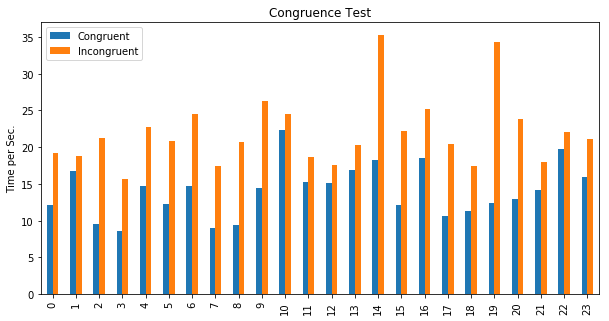

In [6]:
# Build the visualizations here
df.plot(kind='bar', figsize=(10,5))
plt.ylabel("Time per Sec.");
plt.title("Congruence Test")

Text(0.5,1,'Congruence Test')

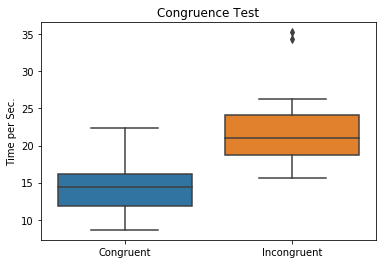

In [7]:
sns.boxplot(data=df[['Congruent', 'Incongruent']]);
plt.ylabel("Time per Sec.");
plt.title("Congruence Test")

#### Observation:
From the two plots we can see that in average the time for Incongruent test is higher than time for Congruent test

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
# Perform the statistical test here
#calculate ttest Critical Value
#sample size
n = 24
#degree of freedom
d_f = 24-1
#confidence level
alpha = 0.05
ci = 1 - alpha
# Critical value
stats.t.ppf(ci, d_f)

1.7138715277470473

In [10]:
from math import sqrt
#differences between to groups
df['Difference'] = df['Incongruent'] - df['Congruent']
n = df['Difference'].count()
#standard error for differences
se = df['Difference'].std()/(sqrt(n))
#differences mean
dm = df['Difference'].mean()
#t-test result
t_value = dm/se
t_value

8.020706944109957

### conclusion

t-test value resulted 8.0207 tha is greater than 1.7139 critical value, So we can Reject the null hypothesis, that there is no statistically significant difference between two tests. <br>
Result match up with expectations that Congruent test time is less than Incongruent test time.


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**- Efect cause:**  I beleive this effect caused by that Brain got confused when processing both element together Color and Word so it takes a delay or more time to observe the right word (Incongruent), since in Congurent test it is easy for brain to just observe the Color faster whithout processing Word  <br>
**- Similar effect:**  Assume in Vision test the same as the Visual Acuity Test done by doctor in clinic, we used a char with circles just opend from one side (right/left/up/down) to exmamine sight, but in our test we will add text beside the opend side
in Congruent test the direction word matches with the opened side , in Incongruent test word dose not match.
you can check this [test chart](https://www.alamy.com/stock-photo-eye-examination-chart-used-for-visual-acuity-testing-89875236.html)